<a href="https://colab.research.google.com/github/fkvivid/DIVER/blob/main/Analysis_of_housing_information.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Problem 1] Acquisition of data set

In [2]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [14]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
df = pd.read_csv('train.csv')

[Problem 2] Investigation of the data set itself

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


[Problem 3] Confirmation of data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


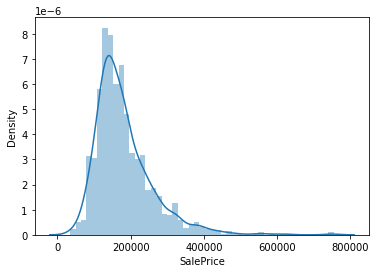

In [15]:
sns.distplot(df['SalePrice']);

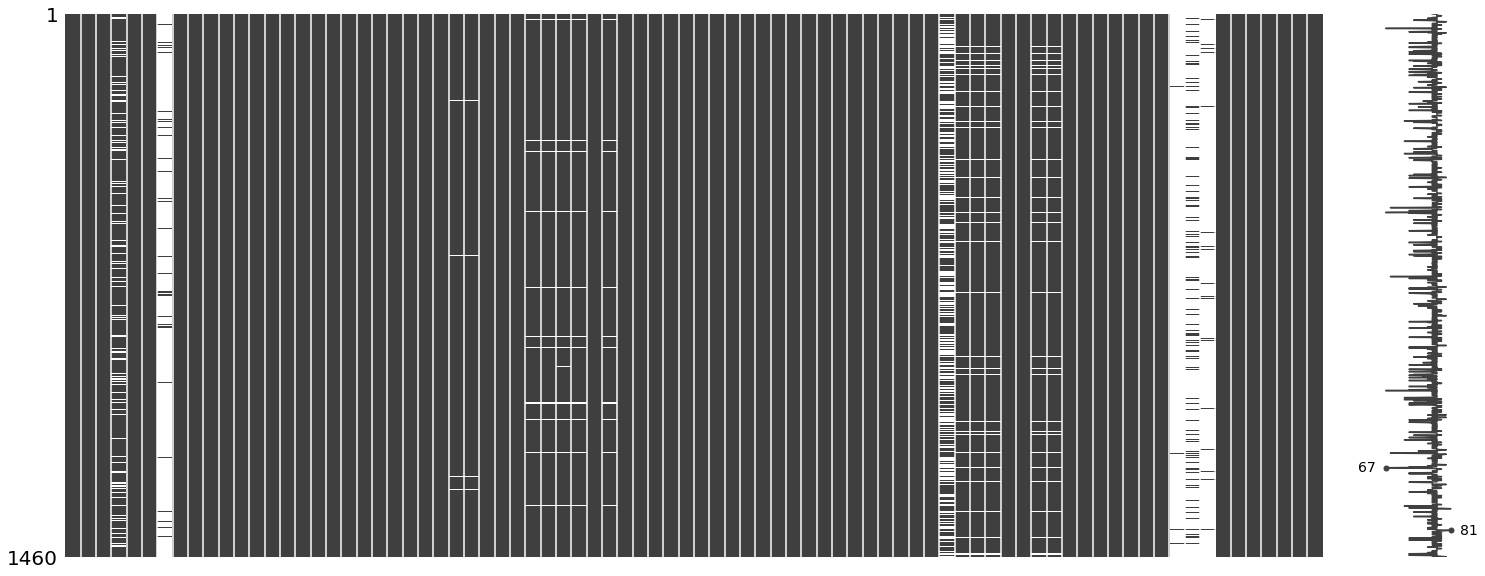

In [16]:
import missingno as msno
%matplotlib inline
msno.matrix(df)

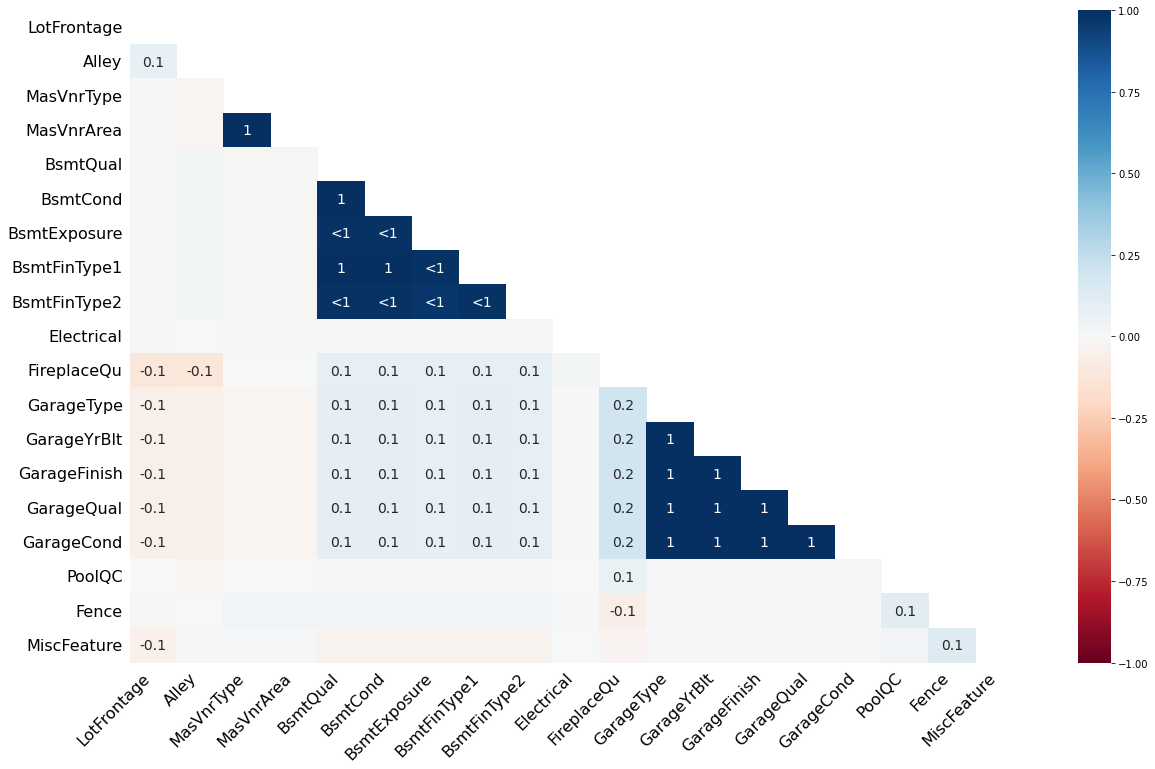

In [17]:
msno.heatmap(df)

In [18]:
df.isnull().sum()/len(df)*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
log_SalePrice     0.000000
Length: 82, dtype: float64

In [19]:
df = df.drop('LotFrontage',axis=1)

In [20]:
df.isnull().sum()/len(df)*100

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotArea          0.0
Street           0.0
                ... 
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
log_SalePrice    0.0
Length: 81, dtype: float64

[Problem 5] Terminology survey

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 1.882876
Kurtosis: 6.536282


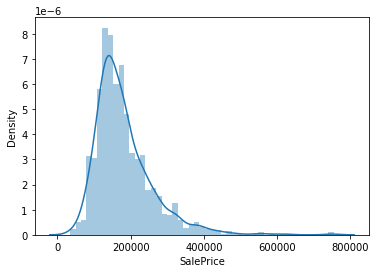

In [21]:
sns.distplot(df['SalePrice']);
#skewness and kurtosis
print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

[Problem 6] Confirmation of distribution

Skewness: 1.882876
Kurtosis: 6.536282


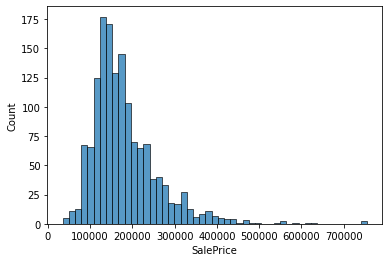

In [22]:
sns.histplot(df['SalePrice']);
#skewness and kurtosis
print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

In [23]:
log_price = np.log(df['SalePrice'])
df['log_SalePrice'] = log_price

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 0.121335
Kurtosis: 0.809532


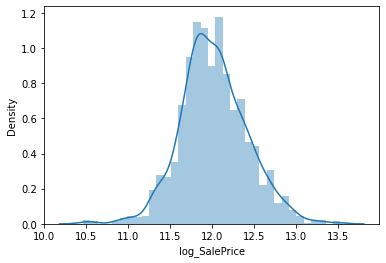

In [24]:
sns.distplot(df['log_SalePrice']);
#skewness and kurtosis
print("Skewness: %f" % df['log_SalePrice'].skew())
print("Kurtosis: %f" % df['log_SalePrice'].kurt())

[Problem 7] Confirmation of correlation coefficient

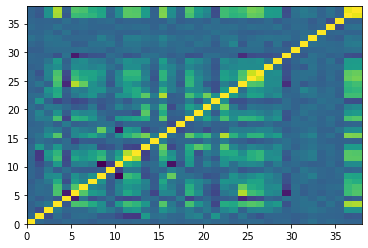

In [27]:
import matplotlib.pyplot as plt

plt.pcolor(df.corr())
plt.show()

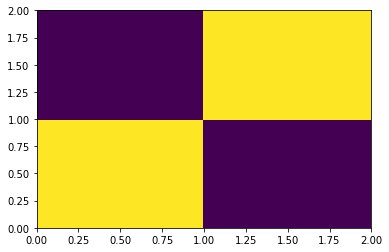

In [35]:
plt.pcolor(df.loc[:,['log_SalePrice','SalePrice']].corr())
plt.show()

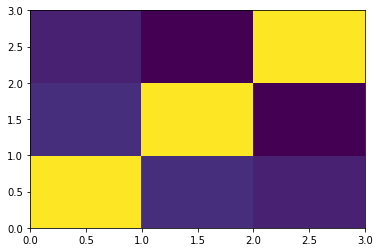

In [37]:
plt.pcolor(df.iloc[:,0:11].corr())
plt.show()

In [38]:
target = 'log_SalePrice'
corr2 = df.corr()
corr_abs_2 = corr2.abs()

nr_all_cols = len(df)
ser_corr_2 = corr_abs_2.nlargest(nr_all_cols, target)[target]

print(ser_corr_2)

log_SalePrice    1.000000
SalePrice        0.948374
OverallQual      0.817184
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489449
MasVnrArea       0.430809
BsmtFinSF1       0.372023
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209044
EnclosedPorch    0.149050
KitchenAbvGr     0.147548
ScreenPorch      0.121208
MSSubClass       0.073959
PoolArea         0.069798
MoSold           0.057329
3SsnPorch        0.054900
LowQualFinSF     0.037963
YrSold           0.037263
OverallCond      0.036868
MiscVal          0.020021
Id               0.017942
BsmtHalfBath     0.005149
BsmtFinSF2       0.004832
Name: log_Sa

In [39]:
# log_SalePrice    1.000000 logarithim Sale Price corr
# SalePrice        0.948374 
# OverallQual      0.817184 
# GrLivArea        0.700927
# GarageCars       0.680625
# GarageArea       0.650888
# TotalBsmtSF      0.612134
# 1stFlrSF         0.596981
# FullBath         0.594771
# YearBuilt        0.586570